In [10]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
from keras import backend as K


In [11]:
import sys
import os

In [12]:
import subprocess

from six import string_types

# Make sure you have all of these packages installed, e.g. via pip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
%matplotlib inline

In [13]:
PLANET_KAGGLE_ROOT = os.path.abspath(r"C:\Users\hp pc\Desktop\computer visi")

In [14]:
PLANET_KAGGLE_JPEG_DIR = os.path.join(PLANET_KAGGLE_ROOT, 'multilabel')
PLANET_KAGGLE_LABEL_CSV = os.path.join(PLANET_KAGGLE_ROOT, 'train.csv')

In [15]:
assert os.path.exists(PLANET_KAGGLE_ROOT)
assert os.path.exists(PLANET_KAGGLE_JPEG_DIR)
assert os.path.exists(PLANET_KAGGLE_LABEL_CSV)

In [16]:
labels_df = pd.read_csv(PLANET_KAGGLE_LABEL_CSV)
labels_df.head()

1  0  0.1  0.2  0.3
0  1  0    0    0    0
1  1  0    0    0    0
2  1  0    0    0    0
3  1  1    0    0    0
4  1  0    0    0    0

In [17]:
labels_list = ['desert'
'mountains'
'sea'
'sunset'
'trees']
labels_df[0:30]

1  0  0.1  0.2  0.3
0   1  0    0    0    0
1   1  0    0    0    0
2   1  0    0    0    0
3   1  1    0    0    0
4   1  0    0    0    0
5   1  0    0    0    0
6   1  1    0    0    0
7   1  0    0    0    0
8   1  0    0    0    0
9   1  1    0    0    0
10  1  0    0    0    0
11  1  0    0    0    0
12  1  0    0    0    0
13  1  0    0    0    0
14  1  0    0    0    0
15  1  0    0    0    0
16  1  0    0    0    0
17  1  0    0    0    0
18  1  0    0    0    0
19  1  0    0    0    0
20  1  0    0    0    1
21  1  0    0    0    0
22  1  0    0    0    0
23  1  0    0    0    1
24  1  0    0    0    0
25  1  0    0    0    0
26  1  0    0    0    0
27  1  0    0    0    1
28  1  0    0    0    0
29  1  0    0    0    0

In [18]:
def load_image(filename):
    '''Look through the directory tree to find the image you specified
    (e.g. train_10.tif vs. train_10.jpg)'''
    for dirname in os.listdir(PLANET_KAGGLE_ROOT):
        path = os.path.abspath(os.path.join(PLANET_KAGGLE_ROOT, dirname, filename))
        if os.path.exists(path):
            #print('Found image {}'.format(path))
            return io.imread(path)
    # if you reach this line, you didn't find the image you're looking for
    #print('Load failed: could not find image {}'.format(path))

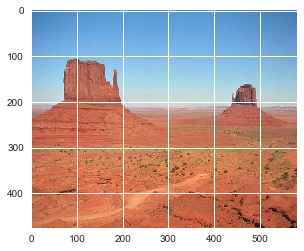

In [19]:
jpg_img = load_image('1.jpg')[:,:,:3]

fig = plt.figure()
plt.imshow(jpg_img)

In [20]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

In [21]:
y_train = labels_df[0:1400]

In [22]:
y_test = labels_df[1499:1900]
train=pd.read_csv(r"C:\Users\hp pc\Desktop\computer visi\train.csv")
train_path=r"C:\Users\hp pc\Desktop\computer visi\multilabel\\"
y_test.shape

(401, 5)

In [23]:
from keras.preprocessing import image
train_img=[]
for i in range(1,1401):

    temp_img=image.load_img(train_path+str(i)+'.jpg',target_size=(100,100))
    #fig = plt.figure()
    #plt.imshow(temp_img)
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)

   

    

In [24]:
train_img[1]

array([[[ 166.,  169.,  169., ...,  127.,  111.,  105.],
        [ 166.,  169.,  169., ...,  127.,  108.,  105.],
        [ 170.,  170.,  172., ...,  114.,  111.,  110.],
        ..., 
        [  49.,   42.,   30., ...,   59.,   75.,   97.],
        [  54.,   36.,   30., ...,   57.,   79.,   92.],
        [  48.,   34.,   28., ...,   59.,   82.,   93.]],

       [[ 213.,  216.,  216., ...,  175.,  163.,  156.],
        [ 213.,  216.,  216., ...,  176.,  160.,  156.],
        [ 217.,  217.,  219., ...,  166.,  163.,  161.],
        ..., 
        [  56.,   52.,   43., ...,   70.,   78.,   92.],
        [  60.,   46.,   43., ...,   66.,   82.,   87.],
        [  54.,   44.,   41., ...,   65.,   85.,   88.]],

       [[ 197.,  200.,  200., ...,  177.,  177.,  175.],
        [ 197.,  200.,  200., ...,  183.,  174.,  175.],
        [ 201.,  201.,  203., ...,  180.,  177.,  180.],
        ..., 
        [  49.,   51.,   49., ...,   66.,   59.,   73.],
        [  56.,   48.,   49., ...,   65., 

In [25]:
from keras.applications.vgg16 import preprocess_input
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)
train_img=preprocess_input(train_img)

# normalize inputs from 0-255 to 0.0-1.0



In [26]:
train_img[1]
y_train[0:100]

1  0  0.1  0.2  0.3
0   1  0    0    0    0
1   1  0    0    0    0
2   1  0    0    0    0
3   1  1    0    0    0
4   1  0    0    0    0
5   1  0    0    0    0
6   1  1    0    0    0
7   1  0    0    0    0
8   1  0    0    0    0
9   1  1    0    0    0
10  1  0    0    0    0
11  1  0    0    0    0
12  1  0    0    0    0
13  1  0    0    0    0
14  1  0    0    0    0
15  1  0    0    0    0
16  1  0    0    0    0
17  1  0    0    0    0
18  1  0    0    0    0
19  1  0    0    0    0
20  1  0    0    0    1
21  1  0    0    0    0
22  1  0    0    0    0
23  1  0    0    0    1
24  1  0    0    0    0
25  1  0    0    0    0
26  1  0    0    0    0
27  1  0    0    0    1
28  1  0    0    0    0
29  1  0    0    0    0
.. .. ..  ...  ...  ...
70  1  0    0    0    0
71  1  0    0    0    0
72  1  0    0    0    0
73  1  0    0    0    0
74  1  0    0    0    0
75  1  0    0    0    0
76  1  0    0    0    0
77  1  0    0    0    0
78  1  0    0    0    0
79  1  1    0    0    0
80  1  0    0    0    0
81  1  0    0    0    0
82  1  0    0    0    0
83  1  0    0    0    0
84  1  0    0    0    0
85  1  0    0    0    1
86  1  0    0    0    0
87  1  0    0    0    0
88  1  0    0    0    0
89  1  0    0    0    0
90  1  0    0    0    0
91  1  0    0    0    0
92  1  0    0    0    0
93  1  0    0    0    0
94  1  0    0    0    0
95  1  0    0    0    0
96  1  0    0    0    0
97  1  0    0    0    0
98  1  0    0    0    0
99  1  0    0    1    0

[100 rows x 5 columns]

In [27]:
test_img=[]
for i in range(1500,1901):

    
    temp_img=image.load_img(train_path+str(i)+'.jpg',target_size=(100,100))
    #fig = plt.figure()
    #plt.imshow(temp_img)
    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)



In [28]:
test_img[1]
train_img.shape
test_img=np.array(test_img) 
#test_img=preprocess_input(test_img)
print(train_img.shape)
train_img =np.reshape(train_img,(1400,3,100,100))
train_img[1]
test_img= np.reshape(test_img,(401,3,100,100))
test_img.shape
#test_img.shape
train_img = train_img / 255.0
test_img = test_img / 255.0


(1400, 3, 100, 100)


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.constraints import maxnorm
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


# Create the model
num_classes =5
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 100, 100), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 100, 100)      896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 100, 100)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 100, 100)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 50, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 80000)             0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 80000)             0         
__________

In [32]:
from keras.optimizers import SGD,Adam
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 100, 100)      896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 100, 100)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 100, 100)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 50, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 80000)             0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 80000)             0         
__________

In [34]:
# Fit the model

epos = 10
model.fit(np.array(train_img), np.array(y_train), validation_data=(np.array(test_img[1:200]), np.array(y_test[1:200])), epochs = epos, batch_size=32)
# Final evaluation of the model


Train on 1400 samples, validate on 199 samples
Epoch 1/10
1400/1400 [==============================] - 247s - loss: 0.5443 - acc: 0.7420 - val_loss: 0.7216 - val_acc: 0.5809
Epoch 2/10
1400/1400 [==============================] - 264s - loss: 0.4573 - acc: 0.7837 - val_loss: 0.8629 - val_acc: 0.6724
Epoch 3/10
1400/1400 [==============================] - 260s - loss: 0.4189 - acc: 0.8093 - val_loss: 1.1999 - val_acc: 0.6302
Epoch 4/10
1400/1400 [==============================] - 259s - loss: 0.4066 - acc: 0.8234 - val_loss: 1.6465 - val_acc: 0.6573
Epoch 5/10
1400/1400 [==============================] - 260s - loss: 0.3923 - acc: 0.8291 - val_loss: 2.0239 - val_acc: 0.6452
Epoch 6/10
1400/1400 [==============================] - 266s - loss: 0.3860 - acc: 0.8311 - val_loss: 2.5540 - val_acc: 0.5578
Epoch 7/10
1400/1400 [==============================] - 263s - loss: 0.3768 - acc: 0.8383 - val_loss: 2.8070 - val_acc: 0.4955
Epoch 8/10
1400/1400 [==============================] - 262s - l

In [35]:
scores = model.evaluate(np.array(test_img), np.array(y_test), verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 46.58%


(3, 100, 100)
[[  9.59034204e-01   2.04684519e-10   5.53099751e-01   4.30769553e-08
    2.63490801e-06]]


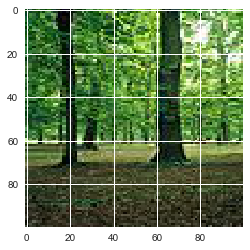

In [36]:
test_img=[]


   
temp_img=image.load_img(train_path+str(1848)+'.jpg',target_size=(100,100))
fig = plt.figure()
plt.imshow(temp_img)
temp_img=image.img_to_array(temp_img)

print(temp_img.shape)
temp_img=np.array(temp_img) 
temp_img= np.reshape(temp_img,(1,3,100,100))
temp_img = temp_img / 255.0
a = model.predict(temp_img)
print(a)

In [ ]:
labels_list = ['desert'
'mountains'
'sea'
'sunset'
'trees']
labels_df[0:30]